In [3]:
#pip install wordcloud

In [4]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

#-------------------------------------
from datetime import datetime

In [5]:
df = pd.read_csv('./files/arabica_studio.csv')

In [6]:
df.columns

Index(['ID', 'Country of Origin', 'Farm Name', 'Mill', 'Company', 'Altitude',
       'Region', 'Producer', 'In-Country Partner', 'Harvest Year', 'Owner',
       'Variety', 'Processing Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'Certification Body'],
      dtype='object')

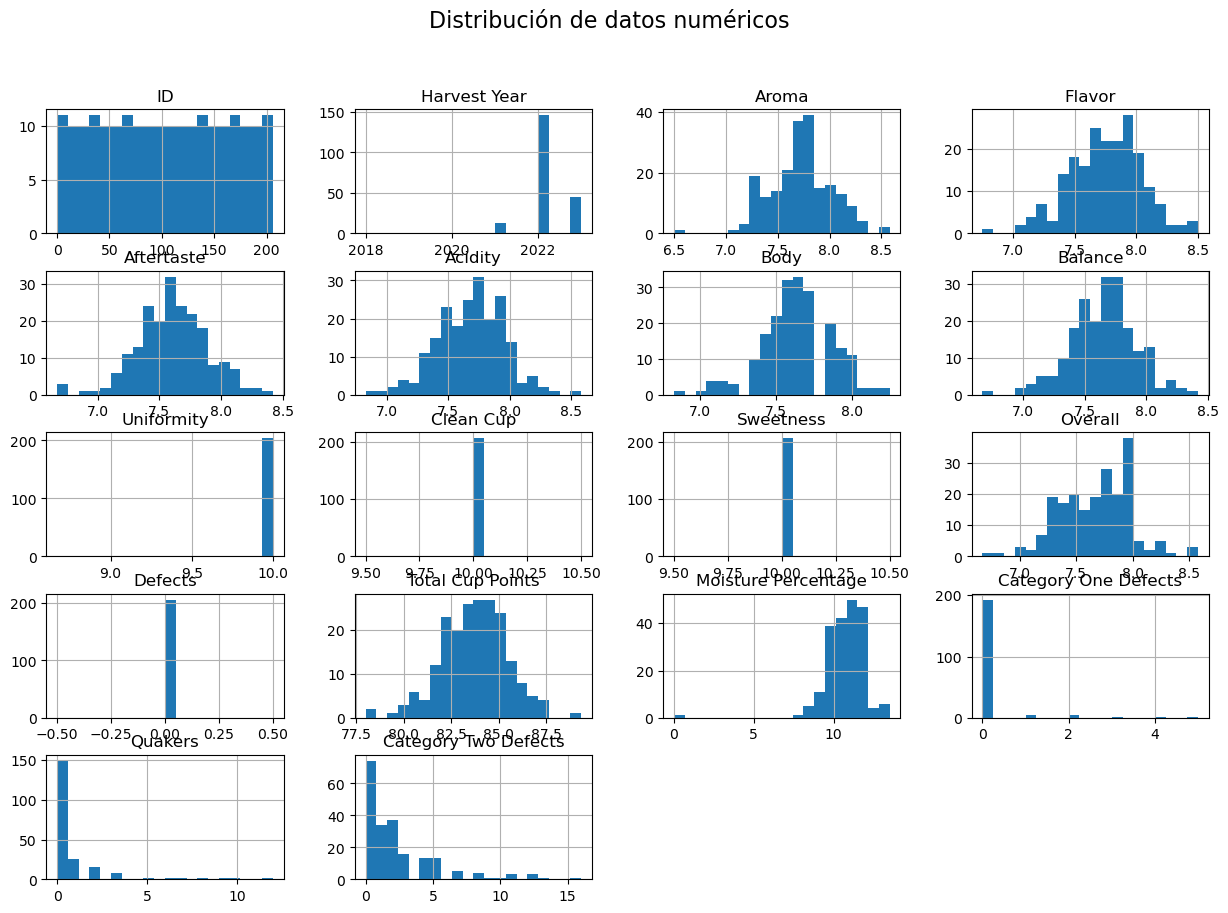

In [7]:
#Distribución de 
df.select_dtypes(include='number').hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribución de datos numéricos", fontsize=16)
plt.show()

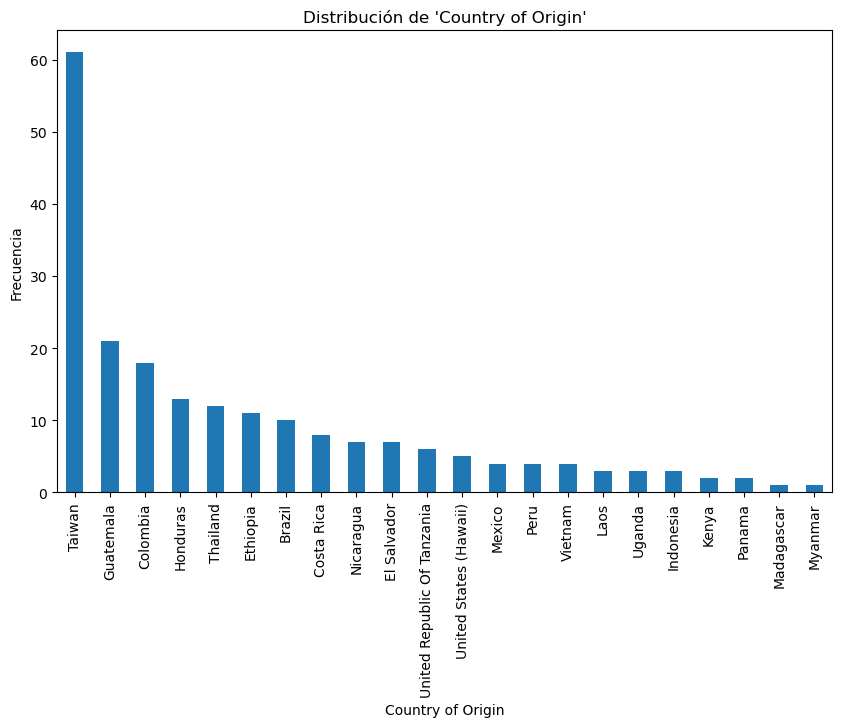

In [8]:
# Gráficos de barras para columnas categóricas

df['Country of Origin'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title(f"Distribución de 'Country of Origin'")
plt.xlabel('Country of Origin')
plt.ylabel("Frecuencia")
plt.show()

import plotly.express as px

# Asegúrate de que tienes columnas 'Latitude' y 'Longitude'
fig = px.scatter_geo(
    df, 
    lat='Latitude', 
    lon='Longitude', 
    hover_name='Region', 
    color='Country',
    title="Distribución Geográfica de las Fincas")
fig.show()

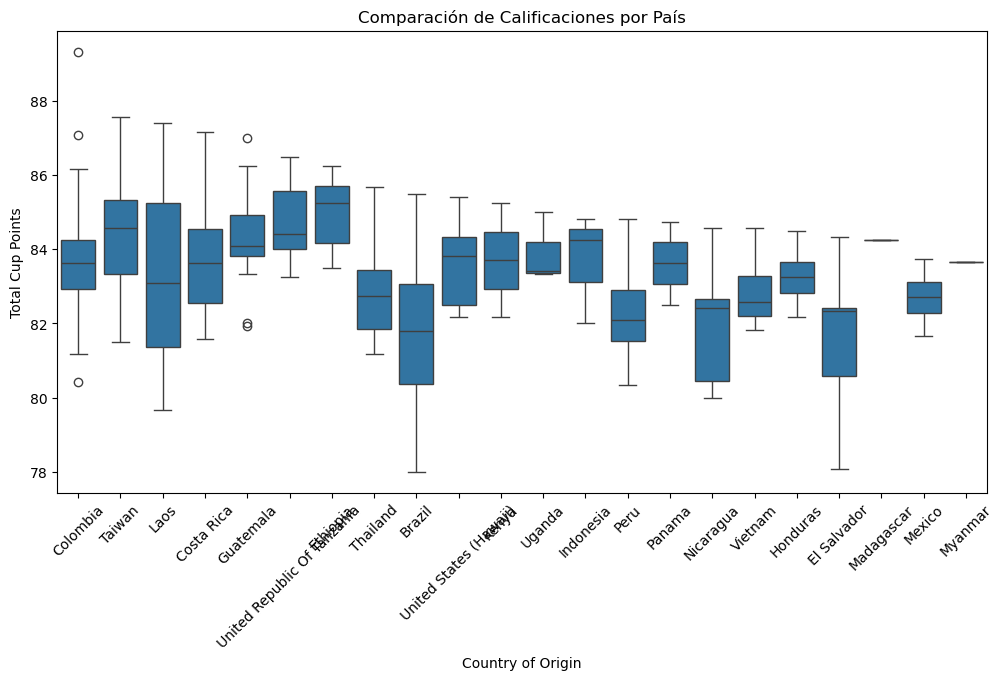

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Country of Origin', y='Total Cup Points')
plt.title("Comparación de Calificaciones por País")
plt.xticks(rotation=45)
plt.show()

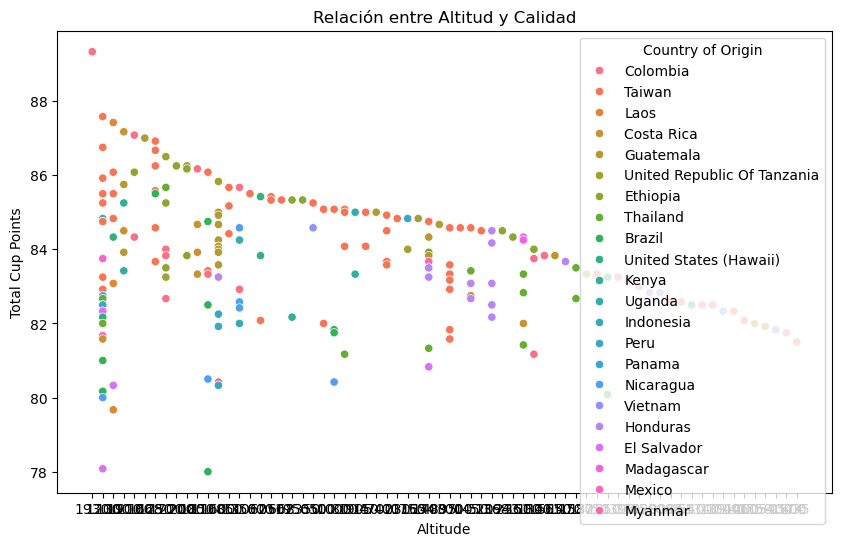

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Altitude', y='Total Cup Points', hue='Country of Origin')
plt.title("Relación entre Altitud y Calidad")
plt.show()

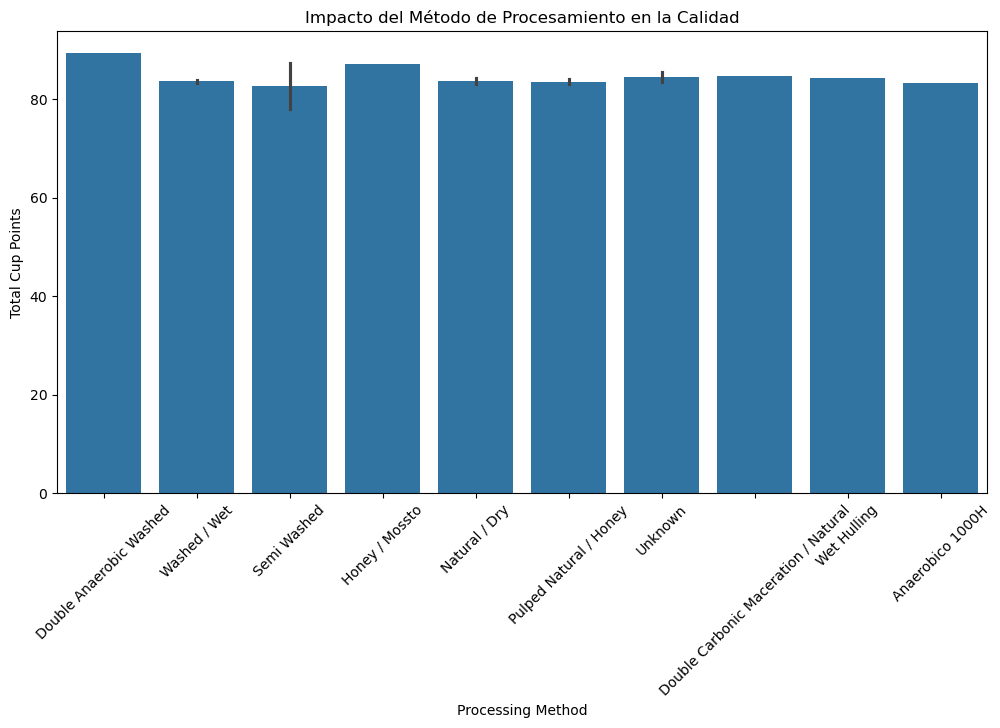

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Processing Method', y='Total Cup Points')
plt.title("Impacto del Método de Procesamiento en la Calidad")
plt.xticks(rotation=45)
plt.show()

In [12]:
df['Country of Origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'United Republic Of Tanzania', 'Ethiopia', 'Thailand', 'Brazil',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Indonesia', 'Peru',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

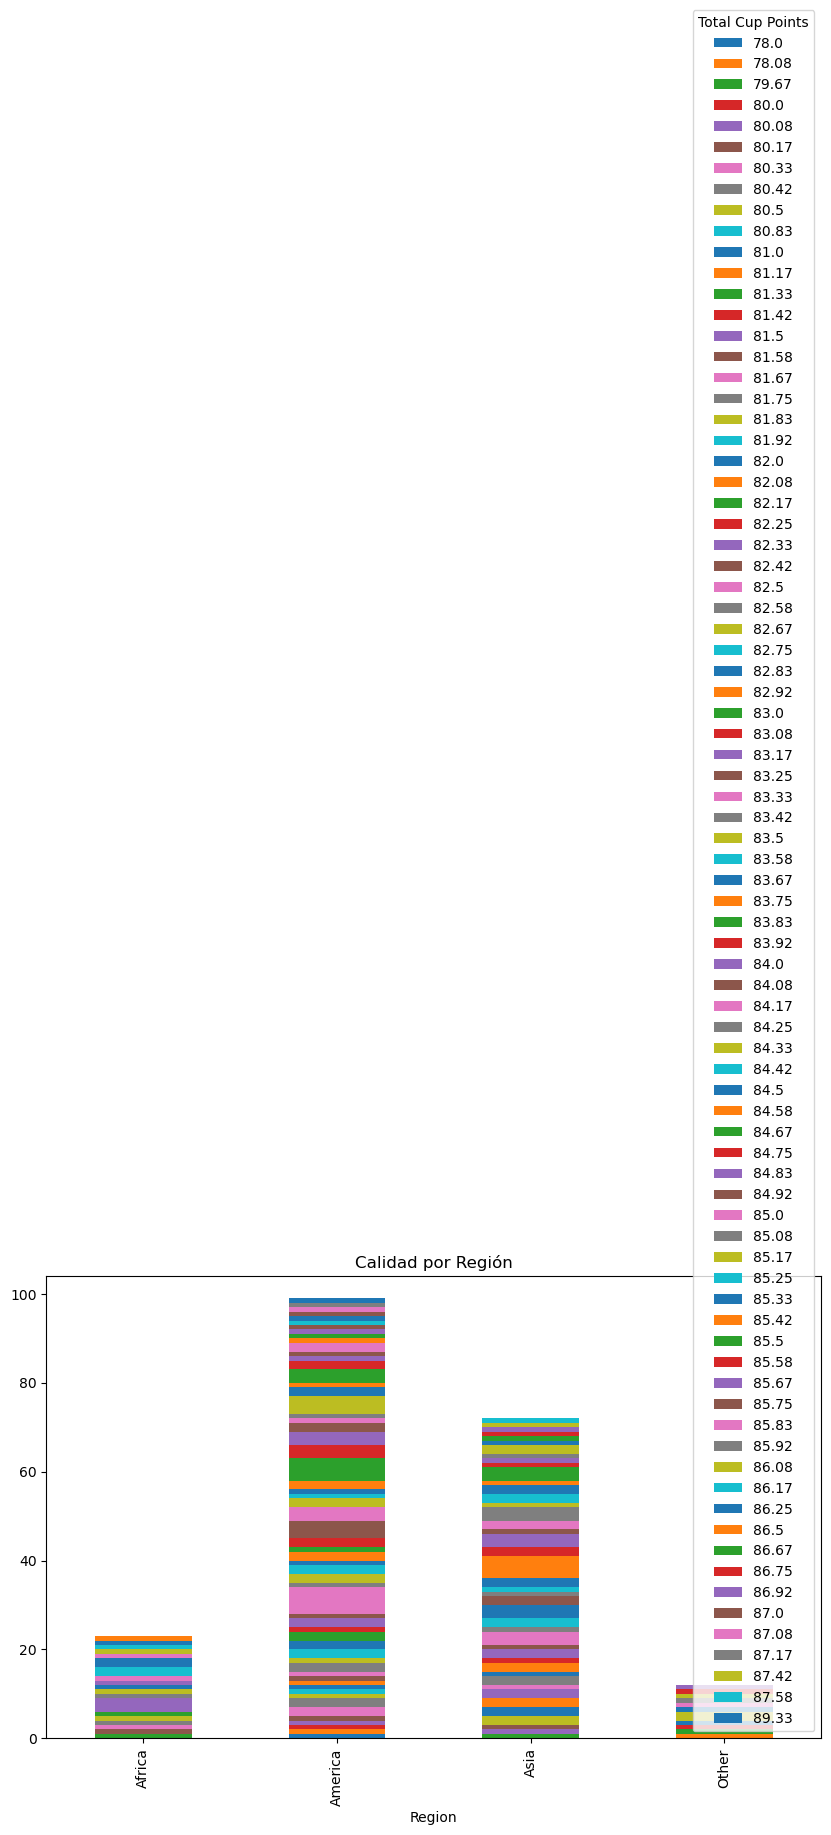

In [13]:
regions = {'America': ['Colombia', 'Costa Rica', 'Guatemala', 'Brazil','United States (Hawaii)', 'Peru', 'Panama', 'Nicaragua','Honduras', 'El Salvador', 'Mexico'],  # Añade países según corresponda
    'Asia': ['Taiwan', 'Laos','Indonesia', 'Vietnam', 'China', 'Myanmar'],
    'Africa':['United Republic Of Tanzania', 'Ethiopia', 'Kenya', 'Uganda', 'Madagascar',]}

df['Region'] = df['Country of Origin'].map(
    lambda x: 'America' if x in regions['America'] else 'Asia' if x in regions['Asia'] else 'Africa' if x in regions['Africa'] else 'Other')

# Gráfico de barras apiladas
region_quality = df.groupby(['Region', 'Total Cup Points']).size().unstack(fill_value=0)
region_quality.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Calidad por Región")
plt.show()

In [15]:
df.head()

,ID,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,In-Country Partner,Harvest Year,Owner,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Certification Body
0,0,Colombia,Finca El Paraiso,Finca El Paraiso,Coffee Quality Union,1930,America,Diego Samuel Bermudez,Japan Coffee Exchange,2022,Coffee Quality Union,Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,Japan Coffee Exchange
1,1,Taiwan,Royal Bean Geisha Estate,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Asia,Cengfusen,Taiwan Coffee Laboratory,2022,Taiwan Coffee Laboratory,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,Taiwan Coffee Laboratory
2,2,Laos,Oklao Coffee Farms,Oklao Coffee Processing Plant,Taiwan Coffee Laboratory,1300,Asia,Wu Tao Chi,Taiwan Coffee Laboratory,2022,Taiwan Coffee Laboratory,Java,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,Taiwan Coffee Laboratory
3,3,Costa Rica,La Cumbre,La Montana Tarrazu Mill,Coffee Quality Union,1900,America,Santa Maria De Dota,Japan Coffee Exchange,2022,Coffee Quality Union,Gesha,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,Japan Coffee Exchange
4,4,Colombia,Finca Santuario,Finca Santuario,Coffee Quality Union,2100,America,Camilo Merizalde,Japan Coffee Exchange,2022,Coffee Quality Union,Red Bourbon,Honey / Mossto,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,Japan Coffee Exchange


In [17]:
df.columns

Index(['ID', 'Country of Origin', 'Farm Name', 'Mill', 'Company', 'Altitude',
       'Region', 'Producer', 'In-Country Partner', 'Harvest Year', 'Owner',
       'Variety', 'Processing Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'Certification Body'],
      dtype='object')

In [16]:

from wordcloud import WordCloud
# Concatenar todos los perfiles de sabor
all_flavors = ' '.join(df['Flavor'].dropna())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_flavors)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras: Perfiles de Sabor")
plt.show()

TypeError: sequence item 0: expected str instance, float found